<a href="https://colab.research.google.com/github/devadharshini2005/pneumonia-prediction-using-deep-learning/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
train_dir = '/content/drive/MyDrive/archive (2)/chest_xray/train'
validation_dir = '/content/drive/MyDrive/archive (2)/chest_xray/train'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 2724 images belonging to 2 classes.
Found 680 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Verify the number of classes
print("Classes found:", train_generator.class_indices)

# Check the first batch of data from the generators
train_batch = next(iter(train_generator))
val_batch = next(iter(validation_generator))

# Print the shapes and types of the data and labels
print("Train data shape:", train_batch[0].shape, "Train data type:", train_batch[0].dtype)
print("Train labels shape:", train_batch[1].shape, "Train labels type:", train_batch[1].dtype)
print("Validation data shape:", val_batch[0].shape, "Validation data type:", val_batch[0].dtype)
print("Validation labels shape:", val_batch[1].shape, "Validation labels type:", val_batch[1].dtype)


Classes found: {'NORMAL': 0, 'PNEUMONIA': 1}
Train data shape: (32, 150, 150, 3) Train data type: float32
Train labels shape: (32, 2) Train labels type: float32
Validation data shape: (32, 150, 150, 3) Validation data type: float32
Validation labels shape: (32, 2) Validation labels type: float32


In [ ]:
# Ensure both generators have the same classes
assert train_generator.class_indices == validation_generator.class_indices, "Class indices do not match"


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Change this to match the number of classes
])


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(2, activation='softmax')  # Adjust based on your number of classes
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the simplified model without callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25  # Increase the number of epochs for better results
)


Epoch 1/25
85/85 [==============================] - 123s 1s/step - loss: 0.3953 - accuracy: 0.8265 - val_loss: 0.4758 - val_accuracy: 0.7679
Epoch 2/25
85/85 [==============================] - 134s 2s/step - loss: 0.3664 - accuracy: 0.8496 - val_loss: 0.5791 - val_accuracy: 0.7574
Epoch 3/25
85/85 [==============================] - 117s 1s/step - loss: 0.3556 - accuracy: 0.8514 - val_loss: 0.4596 - val_accuracy: 0.7768
Epoch 4/25
85/85 [==============================] - 114s 1s/step - loss: 0.3155 - accuracy: 0.8726 - val_loss: 0.5079 - val_accuracy: 0.7649
Epoch 5/25
85/85 [==============================] - 116s 1s/step - loss: 0.3135 - accuracy: 0.8793 - val_loss: 0.5016 - val_accuracy: 0.7693
Epoch 6/25
85/85 [==============================] - 114s 1s/step - loss: 0.3147 - accuracy: 0.8759 - val_loss: 0.4793 - val_accuracy: 0.7961
Epoch 7/25
85/85 [==============================] - 125s 1s/step - loss: 0.3128 - accuracy: 0.8722 - val_loss: 0.4659 - val_accuracy: 0.7991
Epoch 8/25
85

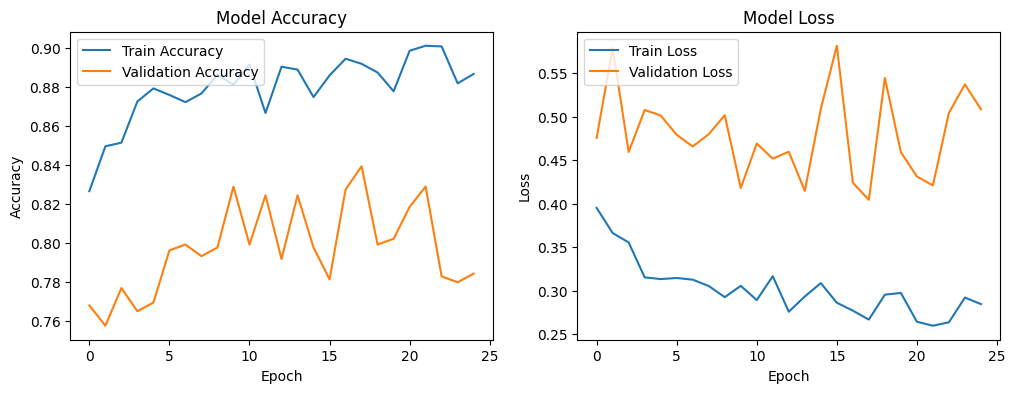

Final Training Accuracy: 0.8867
Final Validation Accuracy: 0.7842
21/21 [==============================] - 18s 864ms/step - loss: 0.5086 - accuracy: 0.7976
Validation Loss: 0.5086
Validation Accuracy: 0.7976


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

# Extracting the final training and validation accuracy
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

# Printing the final accuracies
print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Ensure the validation generator is reset
validation_generator.reset()

# Make predictions
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = validation_generator.classes

# Class labels
class_labels = list(validation_generator.class_indices.keys())

# Generate classification report
report = classification_report(true_classes, predicted_classes[:len(true_classes)], target_names=class_labels)
print(report)


22/22 [==============================] - 25s 1s/step
              precision    recall  f1-score   support

      NORMAL       0.40      0.49      0.44       268
   PNEUMONIA       0.61      0.52      0.57       412

    accuracy                           0.51       680
   macro avg       0.51      0.51      0.50       680
weighted avg       0.53      0.51      0.52       680

